In [1]:
from QNET import *
import warnings
warnings.filterwarnings('ignore')

In this notebook, we will demonstrate the basic functionality of Qnet, describe the classes of objects that populate it, and demonstrate some applications of the software with simple examples for shortest path finding, entanglement swapping, and entanglement purification.

We'll begin by creating an instance of a Qnet graph:

In [2]:
# Make and print an empty Qnet graph.
Graph = Qnet()
print(Graph)

-- Default cost vector --
{'e': 1, 'f': 1}
-- Cost ranges -- 
{'e': (0, 1), 'f': (0.5, 1)}

-- Qnodes --
None
-- Qchans --
None



Every Qnet is initialised with the following attributes:

* **Default cost vector**: <br>
    When an object like a node or an edge is added to the graph, it will be initialised with these default costs.
    

    
* **Cost Ranges** <br>
    These are the range of values that our costs can take
    
    
* **Conversion Methods** <br>
    This is an attribute that is not printed in the cell above. It is a collection of methods for converting costs to and from their additive form


* **Qnodes and Qchans** <br>
    These are the node and edge objects that populate the network. 
    
At the moment this graph is empty. Let us introduce some nodes

In [3]:
Graph.add_qnode(name = 'my node', coords = [1,1,1])
print(Graph)

-- Default cost vector --
{'e': 1, 'f': 1}
-- Cost ranges -- 
{'e': (0, 1), 'f': (0.5, 1)}

-- Qnodes --
Name: "my node"
<class 'QNET.Node.Qnode'>
Coordinates: [1, 1, 1]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

-- Qchans --
None



A node is initialised with a name, an optional list of coordinates in cartesian space, and optional key-word arguements to specify the cost. Since no cost arguements were given, the node was initialised with the default cost vector of the graph.

Every node is required to have a name, and nodes in Qnet are assumed to have unique names. If a node is added to the Qnet with the same name as an existing node, the attributes of the existing node are updated to those of the new node. An example of this is shown below:

In [4]:
# Add a duplicate node, but change some parameters
Graph.add_qnode(name = 'my node', coords = [1,2,3])
print(Graph)

-- Default cost vector --
{'e': 1, 'f': 1}
-- Cost ranges -- 
{'e': (0, 1), 'f': (0.5, 1)}

-- Qnodes --
Name: "my node"
<class 'QNET.Node.Qnode'>
Coordinates: [1, 2, 3]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

-- Qchans --
None



## Nodes of Specialized types

Nodes in Qnet can have different subclasses depending on their functionality. At the moment there are three such subclasses:

* **Source** <br>
    A source node (also known as a ground) is capable of producing entangled Bell pairs. When a node is connected to a source, it means that it can recieve one half of a Bell pair. For a path to be valid in Qnet, it must have at least one source node, otherwise there would be no entanglement resource to distribute.


* **Satellite** <br>
    A satellite is a source node that moves in time. At the moment we only consider a simple satellite that tracks overhead overhead a cartesian plane with constant velocity. In the future, we intend to incorperate geodesic orbits in order to simulate quantum satellite networks.


* **Swapper** <br>
    A swapper is a node that can perform entanglement swapping: an operation to remotely entangle two particles. It requires two Bell pairs and can be implemented deterministically with a CNOT circuit or non-deterministically with a polarising beam splitter. In the Qnet package, the action of entanglement swapping is to take a path with multiple edges in series and reduce it to a path of just one edge.
    
    Entanglement swapping is a *non-optional action*. What this means is that a photon passing through one edge of the swapper node cannot leave through another, making it opaque in some sense. Because of this, if a path is to implement a Swapper node, then there must be *at least one ground node* somewhere on either side of the swapper. (But it need not be adjacent)


In the future we'd like to move away from subclassing and develop a modular framework where node properties can be mixed and matched according to user specifications. This will mitigate the limitations imposed by requiring nodes to conform to just one of the existing subclasses.

In [5]:
# Add nodes of special types
Graph.add_qnode(qnode_type = 'Satellite', name = 'Tesla Roadster', coords = [0,0,100], v_cart = [20,0])
Graph.add_qnode(qnode_type = "Swapper", name = "Alfred Borden", coords = [7,7,7], v_cart = [12, 1])
print(Graph)

-- Default cost vector --
{'e': 1, 'f': 1}
-- Cost ranges -- 
{'e': (0, 1), 'f': (0.5, 1)}

-- Qnodes --
Name: "my node"
<class 'QNET.Node.Qnode'>
Coordinates: [1, 2, 3]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "Tesla Roadster"
<class 'QNET.Node.Satellite'>
Coordinates: [0, 0, 100]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Cartesian == True
Velocity == [20, 0]

Name: "Alfred Borden"
<class 'QNET.Node.Swapper'>
Coordinates: [7, 7, 7]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Swap probability == 0.5

-- Qchans --
None



We can see from the above cell that nodes of different subclasses possess different attributes. For example this satellite node has a velocity of twenty units in the $x$ direction.

## Adding Edges

To make an edge in Qnet, one must specify the two nodes to be linked as well as the costs of the channel. If the cost isn't valid for the graph, (I.E. it's not recognised as one of the default cost types) it's simply ignored. If one or both of the nodes do not exist in the network, default nodes will be created to fill these vacancies and the edge will be created regardless. Because the Qnet object is a multigraph, multiple channels can be added between the same two nodes.

If an edge connects a *satellite node*, the channel is assumed to be a transmission in open air, and the cost of the channel will be automatically evaluated. The methodology for how this cost is inferred will be presented in a later section.

In the future, we hope to type these edges in the same way we type Qnodes. For example, it would be desirable to have a library of subclasses that characterise the costs of various fibre optic cables. Then when a channel of a certain material is created, the initialization method will automatically determine the associated costs from the material parameters and the spatial distance between the nodes.

In [6]:
# Add an edge between nodes
Graph.add_qchan(["my node", "Alfred Borden"], e = 0.7, f = 0.67, invalid_cost="This will not be written!")
print(Graph)

-- Default cost vector --
{'e': 1, 'f': 1}
-- Cost ranges -- 
{'e': (0, 1), 'f': (0.5, 1)}

-- Qnodes --
Name: "my node"
<class 'QNET.Node.Qnode'>
Coordinates: [1, 2, 3]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "Tesla Roadster"
<class 'QNET.Node.Satellite'>
Coordinates: [0, 0, 100]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Cartesian == True
Velocity == [20, 0]

Name: "Alfred Borden"
<class 'QNET.Node.Swapper'>
Coordinates: [7, 7, 7]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Swap probability == 0.5

-- Qchans --
my node <--> Alfred Borden
Costs: {'e': 0.7, 'f': 0.67, 'add_e': 0.35667494393873245, 'add_f': 1.0788096613719298}



In [7]:
# Add multiple edges between the same nodes
Graph.add_qchan(["my node", "Alfred Borden"], e = 0.5, f = 0.5)
Graph.add_qchan(["my node", "Alfred Borden"], e = 0.6, f = 0.6)
print(Graph)

-- Default cost vector --
{'e': 1, 'f': 1}
-- Cost ranges -- 
{'e': (0, 1), 'f': (0.5, 1)}

-- Qnodes --
Name: "my node"
<class 'QNET.Node.Qnode'>
Coordinates: [1, 2, 3]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "Tesla Roadster"
<class 'QNET.Node.Satellite'>
Coordinates: [0, 0, 100]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Cartesian == True
Velocity == [20, 0]

Name: "Alfred Borden"
<class 'QNET.Node.Swapper'>
Coordinates: [7, 7, 7]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Swap probability == 0.5

-- Qchans --
my node <--> Alfred Borden
Costs: {'e': 0.7, 'f': 0.67, 'add_e': 0.35667494393873245, 'add_f': 1.0788096613719298}
my node <--> Alfred Borden
Costs: {'e': 0.5, 'f': 0.5, 'add_e': 0.6931471805599453, 'add_f': inf}
my node <--> Alfred Borden
Costs: {'e': 0.6, 'f': 0.6, 'add_e': 0.5108256237659907, 'add_f': 1.6094379124341005}



## Adding multiple nodes and edges

To facilitate the process of making graphs, one can add many objects by passing lists of dictionaries containing node and edge attributes:

In [8]:
# Add many nodes and edges
Q = QNET.Qnet()

nbunch = [{'name':'A', 'coords': [50,0,0]},
          {'name':'B', 'coords': [250, 0, 0]},
          {'name':'G1', 'coords': [100, 0, 0], 'qnode_type':'Ground'},
          {'name':'G2', 'coords': [200, 0, 0], 'qnode_type': 'Ground'},
          {'name':'T', 'coords': [150, 0, 0], 'qnode_type': 'Swapper'},
          {'name':'S', 'coords': [0,0,100], 'qnode_type': 'Satellite', 'velocity':[30,0], 'range':100},]

Q.add_qnodes_from(nbunch)

ebunch = [{'edge': ('A', 'G1'), 'f': 0.95},
          {'edge': ('G1', 'T'), 'f': 0.95},
          {'edge': ('T', 'G2'), 'f': 0.95},
          {'edge': ('G2', 'B'), 'f': 0.95},
          {'edge': ('S', 'A')},
          {'edge': ('S', 'B'),}]

Q.add_qchans_from(ebunch)
print(Q)

-- Default cost vector --
{'e': 1, 'f': 1}
-- Cost ranges -- 
{'e': (0, 1), 'f': (0.5, 1)}

-- Qnodes --
Name: "A"
<class 'QNET.Node.Qnode'>
Coordinates: [50, 0, 0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "B"
<class 'QNET.Node.Qnode'>
Coordinates: [250, 0, 0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "G1"
<class 'QNET.Node.Ground'>
Coordinates: [100, 0, 0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "G2"
<class 'QNET.Node.Ground'>
Coordinates: [200, 0, 0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "T"
<class 'QNET.Node.Swapper'>
Coordinates: [150, 0, 0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Swap probability == 0.5

Name: "S"
<class 'QNET.Node.Satellite'>
Coordinates: [0, 0, 100]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Cartesian == True
Velocity == [0, 0]

-- Qchans --
A <--> G1
Costs: {'e': 1, 'f': 0.95, 'add_e': 0.0, 'add_f': 0.1053605156578264}
A <--> S
Costs: {'e': 0.506243650494926, 'f': 0.

## Plotting Qnet

Let's visualise the graph "Q" we've just made. In Qnet we can plot our graphs in 2d and 3d, provided the nodes were defined with coordinates. Our plot functions also colour the nodes based on their subclass. Default nodes are red, ground nodes are yellow, satellite nodes are blue, and swapper nodes are teal.

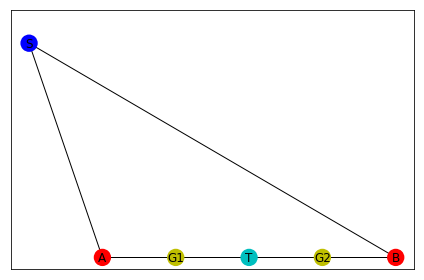

In [9]:
# Plot the graph in 2d dimensions against some field of view.
QNET.plot_2d(Q, FOV = ['x','z'])

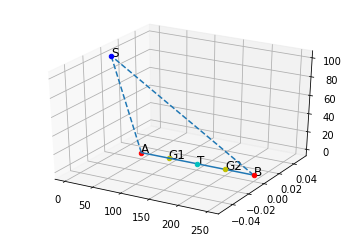

In [10]:
QNET.plot_3d(Q)

## Example: Shortest Path with Qnet

Qnet can be used to evaluate the shortest path costs with respect to a given quantum measure such as efficiency or fidelity. A simple example is presented here, which will be verified by hand in a later section.

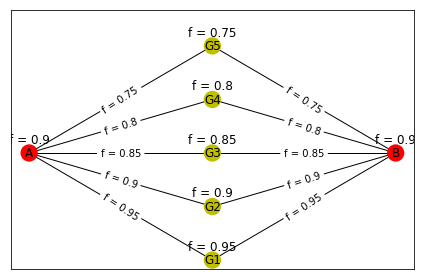

Best path in terms of fidelity:
Path: A-G1-B, Cost: {'e': 1.0, 'f': 0.7332799999999999, 'add_e': 0.0, 'add_f': 0.7623686496018987}



In [11]:
# Import a graph from library of prebuilt models
from QNET.Sample_Graphs.Graph4 import X

# Plot the graph
QNET.plot_2d(X, edge_label = 'f', node_label = 'f')

# Get the shortest path and its respective costs
path = QNET.best_path(X, 'A', 'B', 'f')

print("Best path in terms of fidelity:" + "\n" + str(path) + "\n")

## Entanglement Swapping Demo

The plot below shows a linear network that connects nodes $A$ and $B$. Each channel in this network has perfect efficiency, but the two swapper nodes $T_1$ and $T_2$ are non-deterministic with a success rate $p=0.5$

When we perform entanglement swapping for all swapper nodes in this network, we reduce the graph by creating a direct entanglement link between nodes $A$ and $B$. To illustrate this point better, the network has been bent into a semicircle.

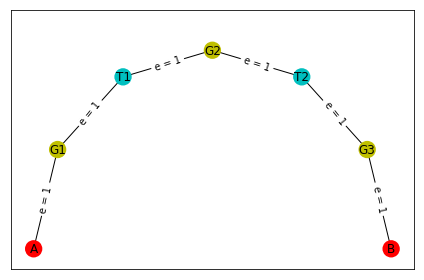

In [12]:
from QNET.Sample_Graphs.swap_demo import X
plot_2d(X, edge_label='e')

Performing the swap reduction method:

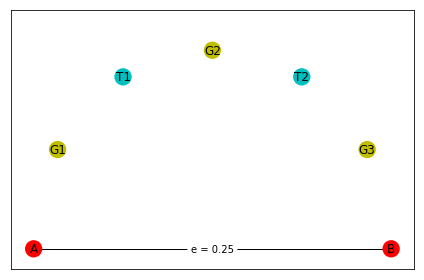

In [13]:
Q = swap_reduce(X, head="A", tail="B")
plot_2d(Q, edge_label='e')

And we obtain a direct entanglement link between $A$ and $B$ with efficiency $0.25$. This is expected since a successful transmission requires two successful swapping applications, thus resulting in a success rate of $1/4$.

## Entanglement Purification Demo

Similarly for purification, we consider a network with two *parallel paths* connecting nodes $A$ and $B$:

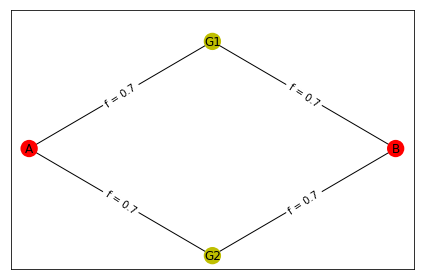

In [14]:
# Import an example network and plot it
from QNET.Sample_Graphs.purify_demo import X
plot_2d(X, edge_label='f')

For reference, paths ($A, G_1, B$) and ($A, G_2, B$) have an identical net fidelity of $F = 0.580$

The purification method takes two edge-disjoint paths between between $A$ and $B$ and creates a direct entanglement link between them with a fidelity:

$$ F' = \frac{F_1 F_2}{F_1 F_2 + (1-F_1)(1-F_2)}$$

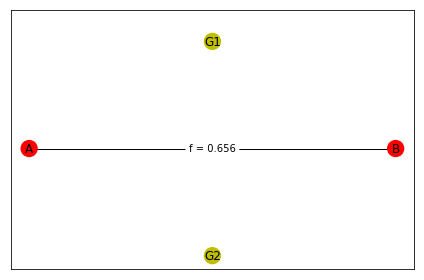

In [15]:
Q = purify_reduce(X, head="A", tail="B")
plot_2d(Q, edge_label='f')

Substituting $F=0.580$ into $F_1$ and $F_2$ of the above equation gives us the post fidelity $F' = 0.656$ as expected.